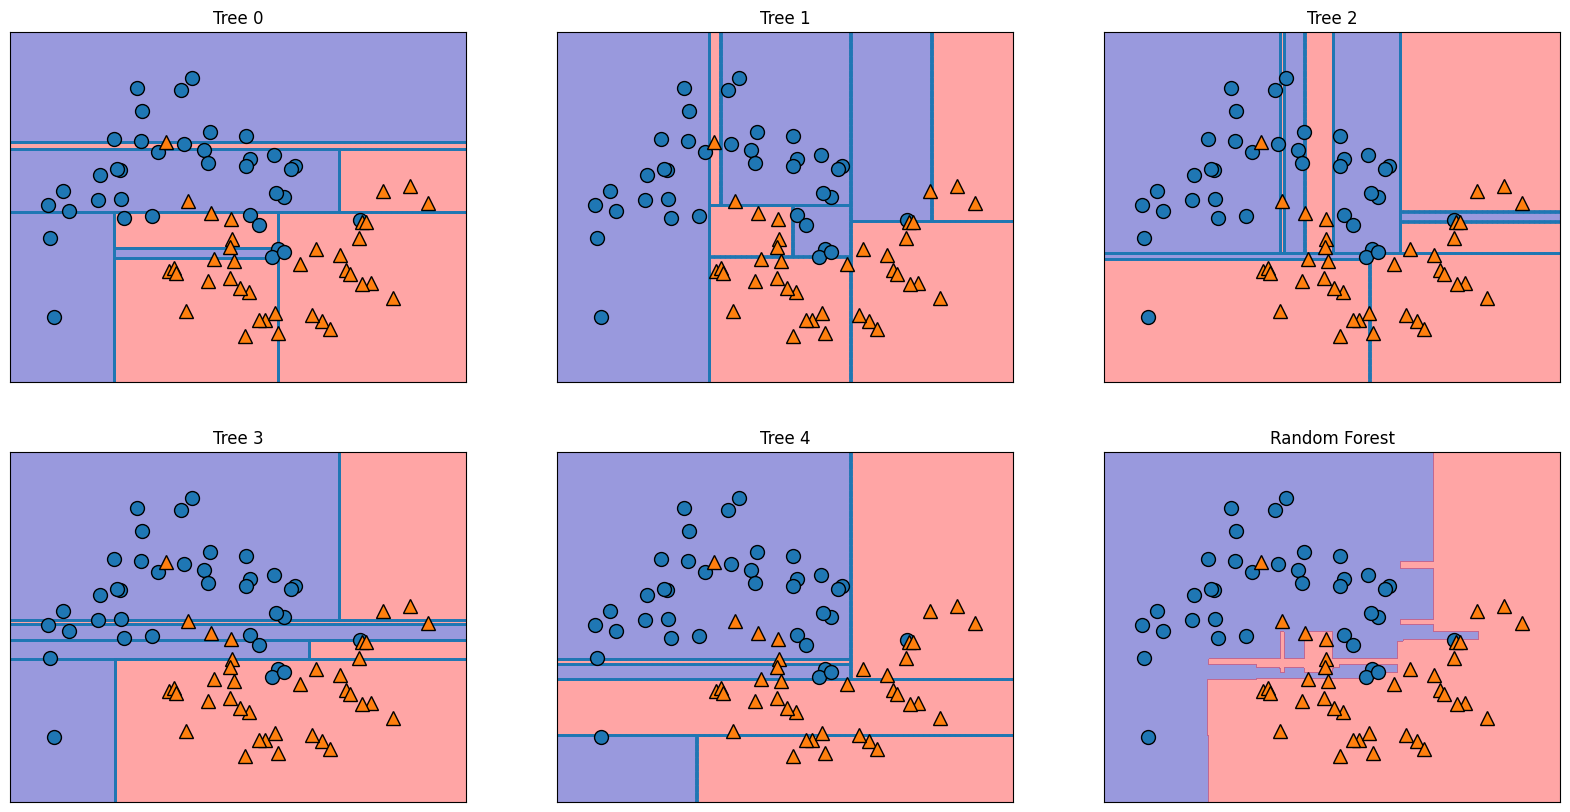

In [1]:
%matplotlib inline

# Classification avec une forêt 

import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train,y_train)

fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[1,2], alpha=.4)
axes[1,2].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)

In [2]:
from sklearn.datasets import load_breast_cancer
bc_dataset = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(bc_dataset.data, bc_dataset.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

print("Précision sur le set d'entrainnement {:.3f}".format(forest.score(X_train,y_train)))
print("Précision sur le set de test {:.3f}".format(forest.score(X_test,y_test)))

Précision sur le set d'entrainnement 1.000
Précision sur le set de test 0.972


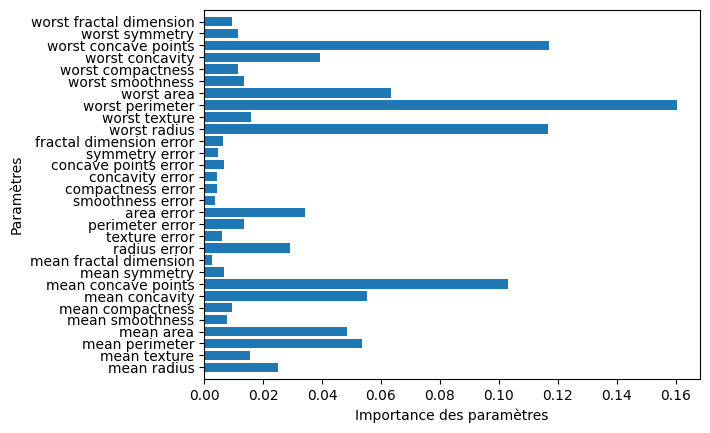

In [3]:
# Comme on peut s'y attendre la précision sur l'entrainnement est parfait, la précision dûe au nombre d'estimateurs
# est meilleure que pour un simple estimateur

# Par ailleurs la distribution de l'importance des paramètres est nettement plus équilibrée
from mglearn_helper import plot_feature_importances_panda_dataset
plot_feature_importances_panda_dataset(forest, bc_dataset)